In [50]:
#Simeon Drapeau
#ECE 404/504: Computational Electromagnetics 
#Feb 21, 2019
#Project 1

#This is a 1D FDTD of EM wave through air & soil
#Inspired by D.M. Sullivan's "Electromagnetic Simulation Using The FDTD Method"


import numpy as np
from numpy import exp
from numpy import pi
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14})

dy = np.zeros(KE)
ey = np.zeros(KE)
hy = np.zeros(KE)
iy = np.zeros(KE)
ga = np.zeros(KE)
gb = np.zeros(KE)

#  The Constants #
KE = 200
kc = int(KE/2)
ddy = 0.01
dt = ddy/6e8
epsz = 8.8e-12
kstart = 1        #dielectric starts here
epsilon = 4.00    #1.0 for air, 4.00 for soil   
sigma = 0.01      #1.0 for air, 0.01 for soil

for k in range(KE):
    ga[k] = 1.0
    gb[k] = 0.0
    ey[k] = 0.0
    dy[k] = 0.0
    hy[k] = 0.0

for k in range(kstart, KE):
    ga[k] = (1./(epsilon + sigma*dt/epsz))
    gb[k] = sigma*dt/epsz
    
#  These Parameters specify the impulse #
t0 = 50.0
spread = 20.0
T = 0
nsteps = 1

#  Boundary Condition  #
ey_low_m1 = 0
ey_low_m2 = 0
ey_high_m1 = 0
ey_high_m2 = 0

#  Begin the Program  #
while (nsteps > 0):
    for n in range (1,1000):
        T = T + 1
        
        #  Calculate the Dx Field  #
        for k in range (1, KE):
            dy[k] = dy[k] + 0.5*(hy[k-1] - hy[k])
             
        #  Put a Gaussian Pulse at the low end  #
        freq_in = 20000 #3e8
        #pulse = np.sin(2*pi*freq_in*T*dt)
        pulse = exp(-0.5*(math.pow((t0-T)/spread,2)))
        dy[kc] = dy[kc] + pulse
        
        #  Calculate Ey from Dy  #
        for k in range(KE-1):
            ey[k] = ga[k]*(dy[k] - iy[k])
            iy[k] = iy[k] + gb[k]*ey[k]
            
        #  Boundary Condition  #
        ey[0] = ey_low_m2
        ey_low_m2 = ey_low_m1
        ey_low_m1 = ey[1]
        
        ey[KE-1] = ey_high_m2
        ey_high_m2 = ey_high_m1
        ey_high_m1 = ey[KE-2]
        
        #  Calculating the Hy Field  
        for k in range(KE-1):
            hy[k] = hy[k] + 0.5*(ey[k] - ey[k-1])
            
    nsteps = 0 #Leave the loop
print ("Done!!!\n")

Done!!!



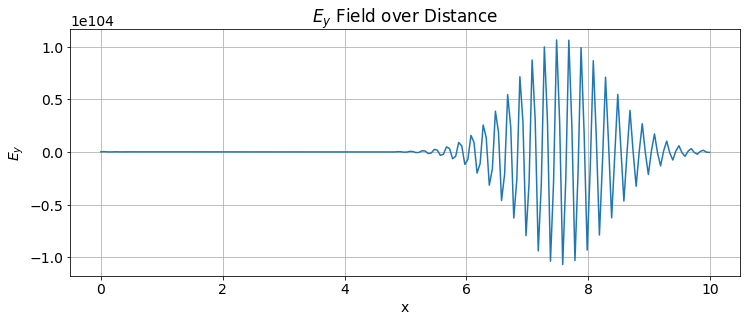

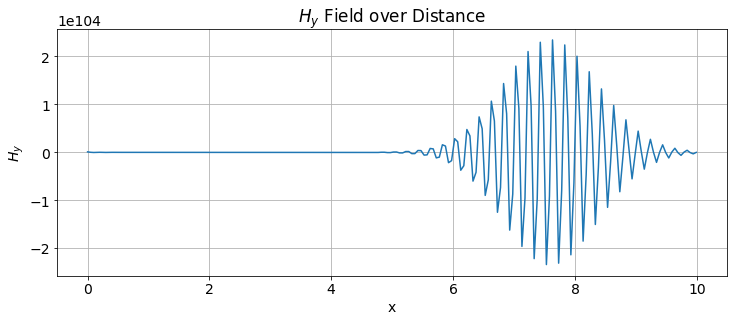

In [49]:
x = np.linspace(0,T*ddy,KE)
myFigSize = (12,10)
plt.figure(figsize=myFigSize)
plt.subplot(2,1,1)
plt.plot(x,ey)
plt.grid(True)
plt.ylabel('$E_y$')
plt.xlabel('x')
plt.title('$E_y$ Field over Distance')
plt.show()

myFigSize = (12,10)
plt.figure(figsize=myFigSize)
plt.subplot(2,1,2)
plt.plot(x,hy)
plt.grid(True)
plt.ylabel('$H_y$')
plt.xlabel('x')
plt.title('$H_y$ Field over Distance')
plt.show()